##  TWEET SENTIMENT SUMMARY 
sentiments expressed in Tweets sent out by the following news organizations: **BBC, CBS, CNN, Fox, and New York times*

### Plot 1
* SCATTERPLOT -  sentiments of the last **100** tweets sent out by each news organization
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

### Plot 2
* BAR PLOT -  _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

### Dataframe
* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
* Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.

In [1]:
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [59]:
users = ['BBCWorld', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']

bbc_list = []
cbs_list = []
cnn_list = []
fox_list = []
nyt_list = []

for status in tweepy.Cursor(api.user_timeline, id='BBCworld').items(100):
    bbc_list.append(status)

for status in tweepy.Cursor(api.user_timeline, id='CBSNews').items(100):
    cbs_list.append(status)
    
for status in tweepy.Cursor(api.user_timeline, id='CNN').items(100):
    cnn_list.append(status)
    
for status in tweepy.Cursor(api.user_timeline, id='FoxNews').items(100):
    fox_list.append(status)
    
for status in tweepy.Cursor(api.user_timeline, id='nytimes').items(100):
    nyt_list.append(status)

In [4]:
bbc_list[0]._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Jun 26 00:32:09 +0000 2018',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'bbc.in/2tvmLRZ',
    'expanded_url': 'https://bbc.in/2tvmLRZ',
    'indices': [72, 95],
    'url': 'https://t.co/7PFuXzyEDM'}],
  'user_mentions': []},
 'favorite_count': 44,
 'favorited': False,
 'geo': None,
 'id': 1011406727806377984,
 'id_str': '1011406727806377984',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 15,
 'retweeted': False,
 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
 'text': "US astronaut Buzz Aldrin sues his two children for 'misuse of finances' https://t.co/7PFuXzyEDM",
 'truncated': False,
 'user': {'contributors_enabled': False,
  'created_a

In [5]:
cnn_list[0]._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Jun 26 00:30:04 +0000 2018',
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/wypeURiFId',
    'expanded_url': 'https://twitter.com/CNN/status/1011406203908485121/photo/1',
    'id': 1011406202201309185,
    'id_str': '1011406202201309185',
    'indices': [109, 132],
    'media_url': 'http://pbs.twimg.com/media/Dgk8lQ3WAAEUGHi.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/Dgk8lQ3WAAEUGHi.jpg',
    'sizes': {'large': {'h': 619, 'resize': 'fit', 'w': 1100},
     'medium': {'h': 619, 'resize': 'fit', 'w': 1100},
     'small': {'h': 383, 'resize': 'fit', 'w': 680},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/wypeURiFId'}],
  'symbols': [],
  'urls': [{'display_url': 'cnn.it/2tuNBd6',
    'expanded_url': 'https://cnn.it/2tuNBd6',
    'indices': [67, 90],
    'url': 'https://t.co/3ZLpCL006e'}],
  'user_mentions': [{'id': 259074538,
  

In [6]:
combined = bbc_list + cbs_list + cnn_list + fox_list + nyt_list

In [7]:
combined[-1]

Status(_api=<tweepy.api.API object at 0x10f8294e0>, _json={'created_at': 'Mon Jun 25 06:22:02 +0000 2018', 'id': 1011132390637494277, 'id_str': '1011132390637494277', 'text': 'Former editors and reporters from The Denver Post are starting their own news outlet called The Colorado Sun https://t.co/akBrZbuUBC', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/akBrZbuUBC', 'expanded_url': 'https://nyti.ms/2yBSTbE', 'display_url': 'nyti.ms/2yBSTbE', 'indices': [109, 132]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 807095, 'id_str': '807095', 'name': 'The New York Times', 'screen_name': 'nytimes', 'location': 'New York City', 'description': 'Where the conversation begins. Follow for breaking news, special reports,

In [8]:
len(combined)

500

In [98]:
bbcdf = pd.DataFrame([x._json for x in bbc_list])[['user', 'text', 'created_at']]

In [99]:
bbcdf.tail()

,user,text,created_at
95,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",100 Women: 'Signing a gagging clause set me fr...,Sun Jun 24 01:36:26 +0000 2018
96,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",What impact has Donald Trump had on illegal im...,Sun Jun 24 01:14:34 +0000 2018
97,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Kenya's 'contaminated sugar' row: What we know...,Sun Jun 24 01:12:13 +0000 2018
98,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Europe migrants: Can the EU reach a new deal? ...,Sun Jun 24 01:09:49 +0000 2018
99,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",How many words do you need to speak a language...,Sun Jun 24 01:07:22 +0000 2018


In [90]:
df = pd.DataFrame([x._json for x in combined])[['user', 'text', 'created_at']]

In [91]:
df.head()

,user,text,created_at
0,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",US astronaut Buzz Aldrin sues his two children...,Tue Jun 26 00:32:09 +0000 2018
1,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Oscars awards body acts to boost diversity wit...,Tue Jun 26 00:04:58 +0000 2018
2,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Billy Elliot 'gay propaganda' row exposes purg...,Mon Jun 25 23:41:22 +0000 2018
3,"{'id': 742143, 'id_str': '742143', 'name': 'BB...","Big winners, big losers: Kenya's addiction to ...",Mon Jun 25 23:38:52 +0000 2018
4,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",US border agents halt migrant family prosecuti...,Mon Jun 25 21:56:48 +0000 2018


In [92]:
df['name'] = df.user.map(lambda x: x.get('name'))

In [93]:
df.head()

,user,text,created_at,name
0,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",US astronaut Buzz Aldrin sues his two children...,Tue Jun 26 00:32:09 +0000 2018,BBC News (World)
1,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Oscars awards body acts to boost diversity wit...,Tue Jun 26 00:04:58 +0000 2018,BBC News (World)
2,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Billy Elliot 'gay propaganda' row exposes purg...,Mon Jun 25 23:41:22 +0000 2018,BBC News (World)
3,"{'id': 742143, 'id_str': '742143', 'name': 'BB...","Big winners, big losers: Kenya's addiction to ...",Mon Jun 25 23:38:52 +0000 2018,BBC News (World)
4,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",US border agents halt migrant family prosecuti...,Mon Jun 25 21:56:48 +0000 2018,BBC News (World)


In [62]:
df.head()

,user,text,created_at,name,tweets_ago
0,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",US astronaut Buzz Aldrin sues his two children...,Tue Jun 26 00:32:09 +0000 2018,BBC News (World),<enumerate object at 0x151bb58fc0>
1,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Oscars awards body acts to boost diversity wit...,Tue Jun 26 00:04:58 +0000 2018,BBC News (World),<enumerate object at 0x151bb58090>
2,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Billy Elliot 'gay propaganda' row exposes purg...,Mon Jun 25 23:41:22 +0000 2018,BBC News (World),<enumerate object at 0x151bb58168>
3,"{'id': 742143, 'id_str': '742143', 'name': 'BB...","Big winners, big losers: Kenya's addiction to ...",Mon Jun 25 23:38:52 +0000 2018,BBC News (World),<enumerate object at 0x151bb58120>
4,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",US border agents halt migrant family prosecuti...,Mon Jun 25 21:56:48 +0000 2018,BBC News (World),<enumerate object at 0x151bb58288>


In [13]:
from sklearn.utils import shuffle

In [14]:
shuffled = shuffle(df)

In [15]:
shuffled.head()

,user,text,created_at,name
368,"{'id': 1367531, 'id_str': '1367531', 'name': '...",'Pawn Stars' staple Richard Harrison dead: 5 f...,Mon Jun 25 17:29:09 +0000 2018,Fox News
139,"{'id': 15012486, 'id_str': '15012486', 'name':...",Gun industry leaders are seeking additional pr...,Mon Jun 25 17:54:42 +0000 2018,CBS News
352,"{'id': 1367531, 'id_str': '1367531', 'name': '...",Dem Strategist: 'Hypocritical' for GOP to Call...,Mon Jun 25 19:43:20 +0000 2018,Fox News
281,"{'id': 759251, 'id_str': '759251', 'name': 'CN...",A top Netflix executive has left the company a...,Mon Jun 25 12:15:02 +0000 2018,CNN
36,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Turkey country profile https://t.co/xoERzuQNDb,Mon Jun 25 15:01:23 +0000 2018,BBC News (World)


In [16]:
analyzer = SentimentIntensityAnalyzer() # Initialize the class

In [17]:
for tweet in shuffled.text: # Iterate over phrases, get the 3 pieces of the sentiment score
    vs = analyzer.polarity_scores(tweet)
    print("{} {}".format(tweet, str(vs)))

'Pawn Stars' staple Richard Harrison dead: 5 fast facts about the 'Old Man' https://t.co/ffnuW4xkJb {'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'compound': -0.6486}
Gun industry leaders are seeking additional protection in Congress as they continue to find the cold shoulder throu… https://t.co/9aIF7i9HUH {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'compound': -0.34}
Dem Strategist: 'Hypocritical' for GOP to Call Out Maxine Waters After Trump's Behavior. https://t.co/Cv4gwC2xVC {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
A top Netflix executive has left the company after he used the N-word in front of colleagues on more than one occas… https://t.co/2r6E82AlPz {'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.2023}
Turkey country profile https://t.co/xoERzuQNDb {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Obituary: Suman Virk, the mother who forgave her daughter's killer https://t.co/E52qPUTM0Z {'neg': 0.274, 'neu': 0.573, 'pos': 0.153, 'compound': -0.4404}
Northern Cal

In [18]:
def get_sentiment(some_text):
    return analyzer.polarity_scores(some_text)

In [19]:
shuffled['sent'] = shuffled.text.map(get_sentiment)

/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
shuffled['pos']= shuffled.sent.map(lambda x :x.get('pos'))
shuffled['neg']= shuffled.sent.map(lambda x :x.get('neg'))
shuffled['neu']= shuffled.sent.map(lambda x :x.get('neu'))

/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [21]:
shuffled['compound']= shuffled.sent.map(lambda x :x.get('compound'))

/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
shuffled.tail()

,user,text,created_at,name,sent,pos,neg,neu,compound
286,"{'id': 759251, 'id_str': '759251', 'name': 'CN...",Federal prosecutors have canceled their planne...,Mon Jun 25 11:17:42 +0000 2018,CNN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000
112,"{'id': 15012486, 'id_str': '15012486', 'name':...","""I wouldn't ask anyone to leave."" \n\n@jeffglo...",Mon Jun 25 22:44:00 +0000 2018,CBS News,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000
9,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",An extraordinary denouement to Group B https:/...,Mon Jun 25 20:00:19 +0000 2018,BBC News (World),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000
192,"{'id': 15012486, 'id_str': '15012486', 'name':...",Trump rallies Republicans in Las Vegas https:/...,Mon Jun 25 09:03:03 +0000 2018,CBS News,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000
427,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",We were able to reconstruct the building’s lay...,Mon Jun 25 19:12:15 +0000 2018,The New York Times,"{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'comp...",0.0,0.153,0.847,-0.5574


In [23]:
shuffled[['pos', 'neg', 'neu']].describe()
#you could put this into a dict 

,pos,neg,neu
count,500.000000,500.000000,500.00000
mean,0.066350,0.091794,0.84184
std,0.097799,0.124517,0.14163
min,0.000000,0.000000,0.39800
25%,0.000000,0.000000,0.74025
50%,0.000000,0.000000,0.84700
75%,0.127000,0.163000,1.00000
max,0.430000,0.602000,1.00000


In [24]:
#so need a column of tweets ago - modify with datetime? 
#scatterplot tweet sentiment on y, "tweets ago" on x
#barplot tweet polarity on y, news source on x

In [25]:
dfbar = shuffled[['name', 'compound']]

In [26]:
dfbar.head()

,name,compound
368,Fox News,-0.6486
139,CBS News,-0.3400
352,Fox News,0.0000
281,CNN,0.2023
36,BBC News (World),0.0000


In [27]:
dfbar = dfbar.groupby('name').mean()

In [28]:
type(dfbar)

pandas.core.frame.DataFrame

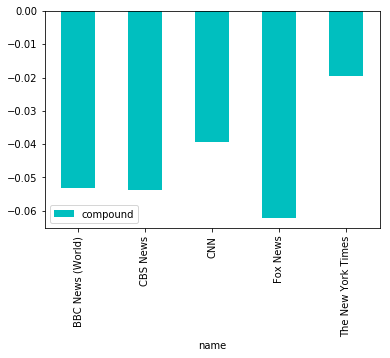

In [47]:
dfbar.plot.bar(color='c');

In [52]:
shuffled.dtypes

user           object
text           object
created_at     object
name           object
sent           object
pos           float64
neg           float64
neu           float64
compound      float64
dtype: object

In [ ]:
f = lambda x: 

In [80]:
bbc = list(enumerate(bbc_list))
# cbs_list = []
# cnn_list = []
# fox_list = []
# nyt_list = []
# >>> for i, e in reversed(list(enumerate(a))):
# ...     print i, e
# ... 
#list(enumerate(mylist))

In [ ]:
bbcdf = pd.DataFrame([x._json for x in bbc_list])[['user', 'text', 'created_at']]